In [15]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import Counter

In [16]:
# data_path = os.getcwd() + '/Data/training_data.csv'
data_path = '/Users/dhk/Desktop/Github/HeartDiseasePrediction/Data/training_data.csv'
data = pd.read_csv(data_path)
data.head()

,Patient ID,Recording locations:,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Outcome,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,High,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,Low,Blowing,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,Low,Harsh,NaN,NaN,NaN,NaN,NaN,Abnormal,CC2015,NaN


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                942 non-null    int64  
 1   Recording locations:      942 non-null    object 
 2   Age                       868 non-null    object 
 3   Sex                       942 non-null    object 
 4   Height                    826 non-null    float64
 5   Weight                    837 non-null    float64
 6   Pregnancy status          942 non-null    bool   
 7   Murmur                    942 non-null    object 
 8   Murmur locations          179 non-null    object 
 9   Most audible location     179 non-null    object 
 10  Systolic murmur timing    178 non-null    object 
 11  Systolic murmur shape     178 non-null    object 
 12  Systolic murmur grading   178 non-null    object 
 13  Systolic murmur pitch     178 non-null    object 
 14  Systolic m

In [18]:
data.describe()

,Patient ID,Height,Weight,Additional ID
count,942.000000,826.000000,837.000000,140.000000
mean,66624.319533,110.800242,23.632756,58208.735714
std,16966.858912,30.000607,15.453337,10216.094378
min,2530.000000,35.000000,2.300000,23625.000000
25%,50263.250000,89.000000,12.500000,50092.000000
50%,68452.500000,115.000000,20.400000,50661.500000
75%,84938.500000,133.000000,31.200000,68466.250000
max,85349.000000,180.000000,110.800000,85234.000000


In [19]:
data.nunique().sort_values(ascending=False)

Patient ID                  942
Weight                      435
Additional ID               140
Height                      132
Recording locations:         28
Murmur locations             17
Systolic murmur shape         4
Age                           4
Most audible location         4
Systolic murmur timing        4
Diastolic murmur pitch        3
Diastolic murmur grading      3
Systolic murmur quality       3
Systolic murmur pitch         3
Systolic murmur grading       3
Murmur                        3
Pregnancy status              2
Diastolic murmur quality      2
Outcome                       2
Campaign                      2
Sex                           2
Diastolic murmur timing       1
Diastolic murmur shape        1
dtype: int64

## Cardiac Murmurs Analysis: 

- Distribution across age groups and auscultation locations.

In [20]:
from collections import Counter

# 'nan' should be replaced by 'Young Adult'
# age_groups = Counter(data['Age'])

data['Age'].fillna('Young Adult', inplace = True)
age_groups = Counter(data['Age'])

age_groups

Counter({'Child': 664,
         'Adolescent': 72,
         'Infant': 126,
         'Young Adult': 74,
         'Neonate': 6})

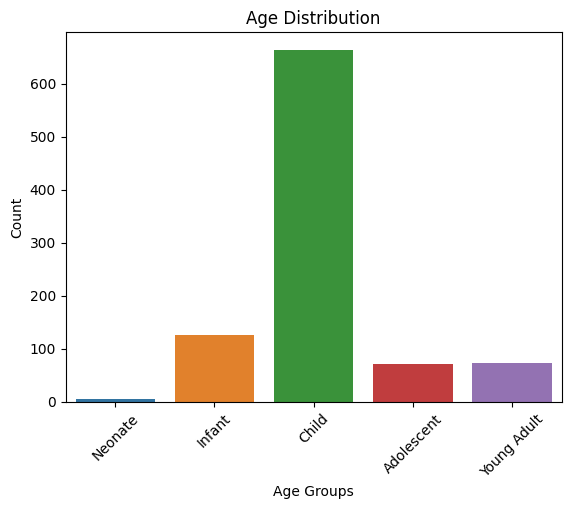

In [21]:
# Convert the Counter object into a DataFrame
age_groups_df = pd.DataFrame.from_dict(age_groups, orient='index', columns=['Count'])
age_order = ['Neonate','Infant','Child','Adolescent','Young Adult']

# Use Seaborn to create a bar plot
sns.barplot(x=age_groups_df.index, y=age_groups_df['Count'], order=age_order)

plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

In [23]:
# Split the values by '+', create a list of all locations
data['Channels'] = data['Recording locations:'].str.split('+') ## Have to find out whether to use the 'murmur location' column instead...

# Get a entire channels
all_channels = [channel for sublist in data['Channels'] for channel in sublist]

# Get the set of all locations
channels = set(all_channels)

# Count the occurrences of each channel
channels_counts = Counter(all_channels)

# Print the total count of each channel
channels_counts

Counter({'AV': 800, 'PV': 766, 'TV': 732, 'MV': 861, 'Phc': 4})

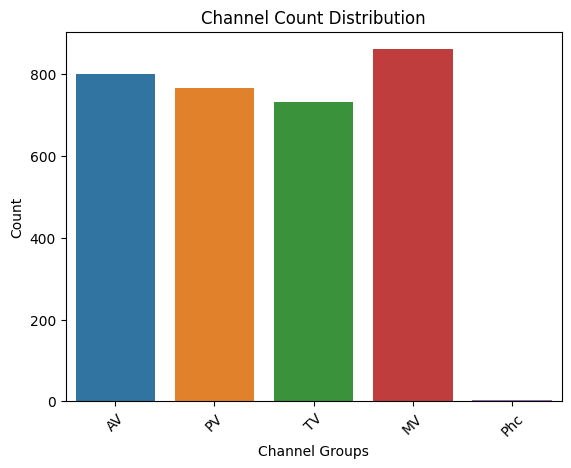

In [24]:
# Convert the Counter object into a DataFrame
channels_df = pd.DataFrame.from_dict(channels_counts, orient='index', columns=['Count'])

# Use Seaborn to create a bar plot
sns.barplot(x=channels_df.index, y=channels_df['Count'])

plt.xlabel('Channel Groups')
plt.ylabel('Count')
plt.title('Channel Count Distribution')
plt.xticks(rotation=45)
plt.show()

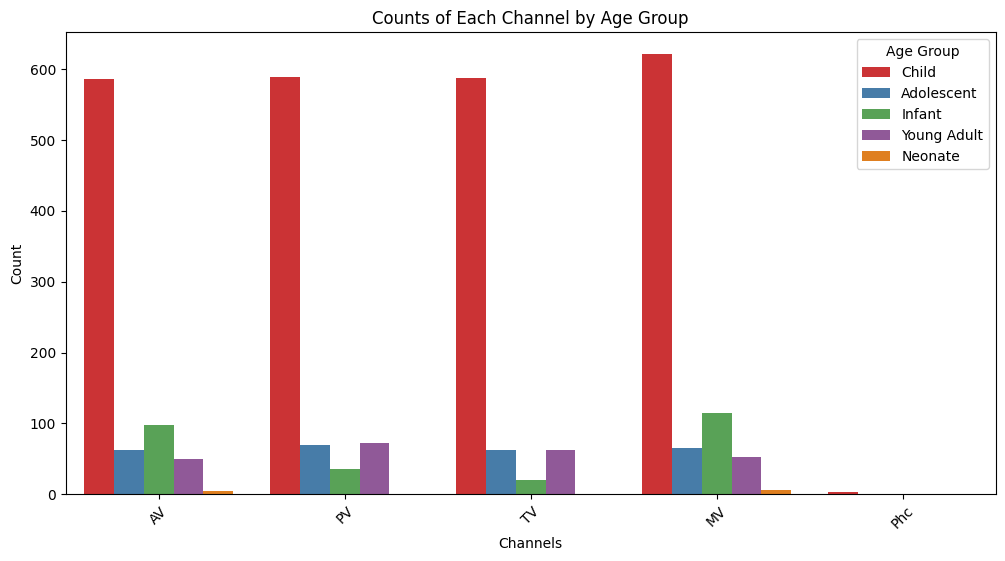

In [25]:
# Temporary data frame to explore correlation between age group and channels count
age_channel_df = data.explode('Channels')[['Age', 'Channels']]

plt.figure(figsize=(12, 6))
sns.countplot(data=age_channel_df, x='Channels', hue='Age', palette='Set1')
plt.title('Counts of Each Channel by Age Group')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

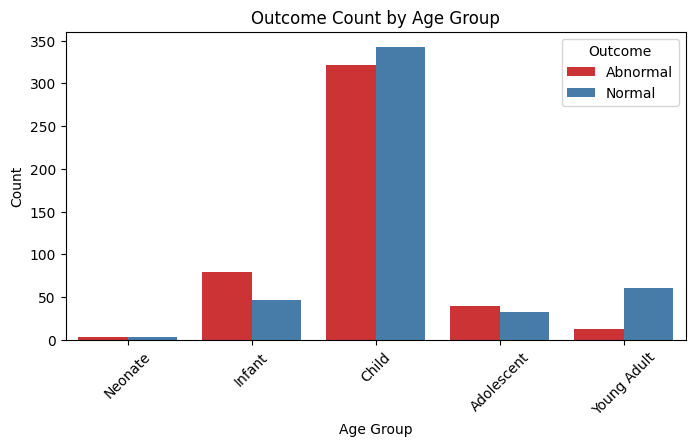

In [46]:
# Temporary data frame to explore correlation between age group and the outcome
age_outcome_df = data[['Age', 'Outcome']]

plt.figure(figsize=(8, 4))
sns.countplot(data=age_outcome_df, x='Age', hue='Outcome', palette='Set1', order=age_order)
plt.title('Outcome Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

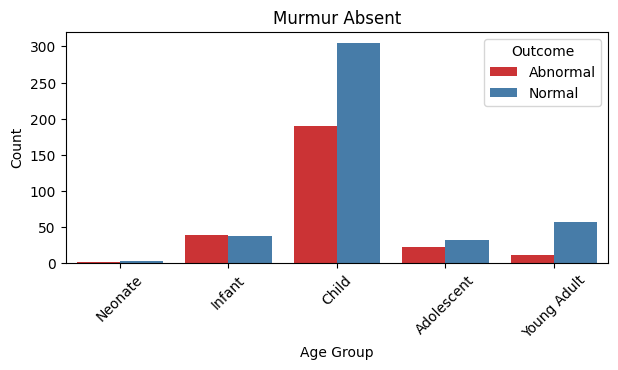

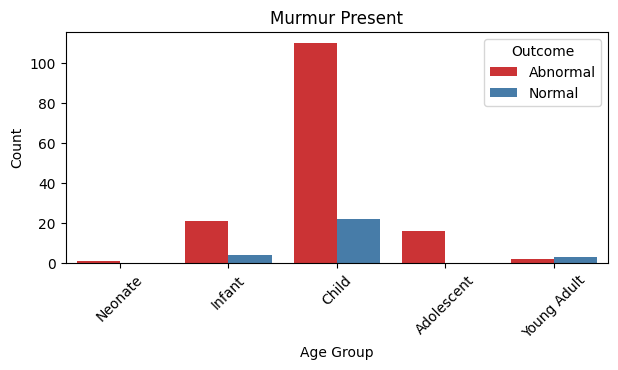

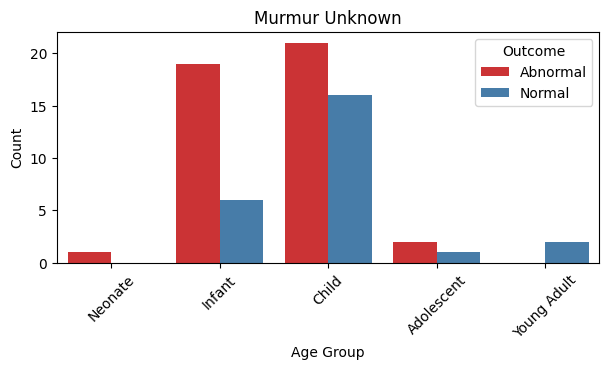

In [57]:
# Age, Outcome, Murmur dataframe
aom_df = data[['Age', 'Outcome', 'Murmur']]

for indicator in aom_df['Murmur'].unique(): 
    plt.figure(figsize=(7, 3))
    sns.countplot(data=aom_df[aom_df['Murmur'] == indicator], x='Age', hue='Outcome', palette='Set1', order=age_order)
    
    plt.title('Murmur ' + indicator)
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Outcome')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()

## **Annotations Analysis:**

Explore timing, shape, pitch, grading, quality, and location of murmurs.




In [82]:
Systolic_df = data[['Age','Systolic murmur timing','Systolic murmur shape', 'Systolic murmur grading', 'Systolic murmur pitch', 'Systolic murmur quality']]

Systolic_df.head()

,Age,Systolic murmur timing,Systolic murmur shape,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality
0,Child,NaN,NaN,NaN,NaN,NaN
1,Child,Holosystolic,Diamond,III/VI,High,Harsh
2,Child,NaN,NaN,NaN,NaN,NaN
3,Child,Holosystolic,Plateau,I/VI,Low,Blowing
4,Child,Early-systolic,Plateau,II/VI,Low,Harsh


Systolic murmur timing
[nan 'Holosystolic' 'Early-systolic' 'Mid-systolic' 'Late-systolic']
Counter({nan: 764, 'Holosystolic': 101, 'Early-systolic': 59, 'Mid-systolic': 17, 'Late-systolic': 1})



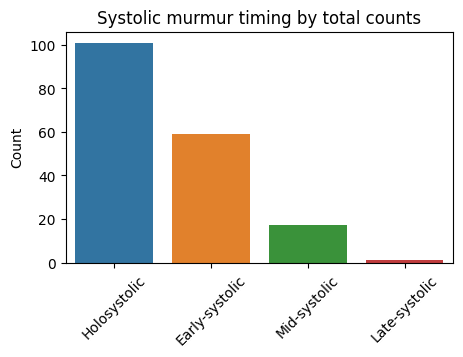

Systolic murmur shape
[nan 'Diamond' 'Plateau' 'Decrescendo' 'Crescendo']
Counter({nan: 764, 'Plateau': 111, 'Decrescendo': 34, 'Diamond': 31, 'Crescendo': 2})



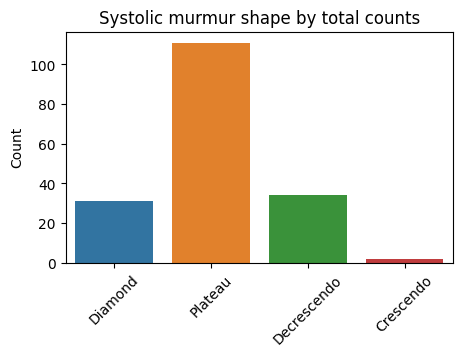

Systolic murmur grading
[nan 'III/VI' 'I/VI' 'II/VI']
Counter({nan: 764, 'I/VI': 104, 'III/VI': 46, 'II/VI': 28})



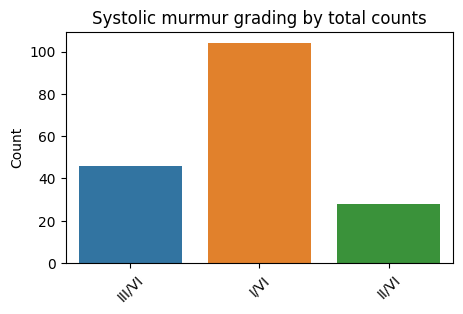

Systolic murmur pitch
[nan 'High' 'Low' 'Medium']
Counter({nan: 764, 'Low': 87, 'Medium': 49, 'High': 42})



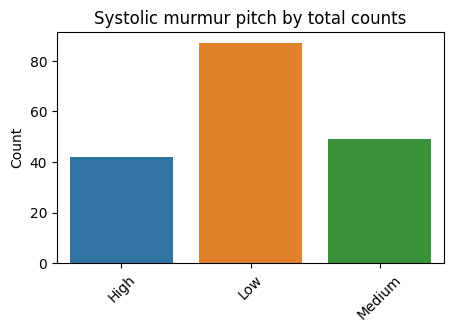

Systolic murmur quality
[nan 'Harsh' 'Blowing' 'Musical']
Counter({nan: 764, 'Harsh': 96, 'Blowing': 78, 'Musical': 4})



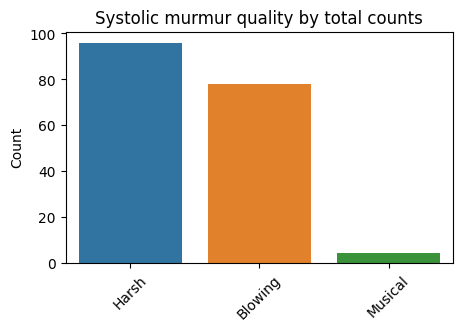

In [84]:
# Loop through the columns and display unique values along with column names
for col in Systolic_df.iloc[:,1:]:
    unique_values = Systolic_df[col].unique()
    counter_obj = Counter(Systolic_df[col])
    
    print(f"{col}\n{unique_values}\n{counter_obj}\n")

    counter_df = pd.DataFrame.from_dict(counter_obj, orient='index', columns=['Count'])
    
    plt.figure(figsize=(5, 3))
    sns.barplot(x=counter_df.index, y=counter_df['Count'])
    plt.title(col + " by total counts")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()

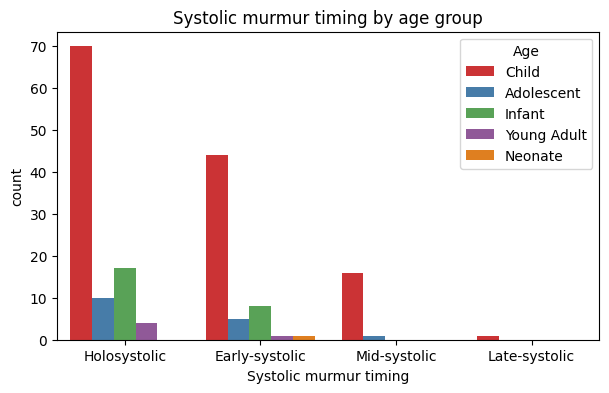

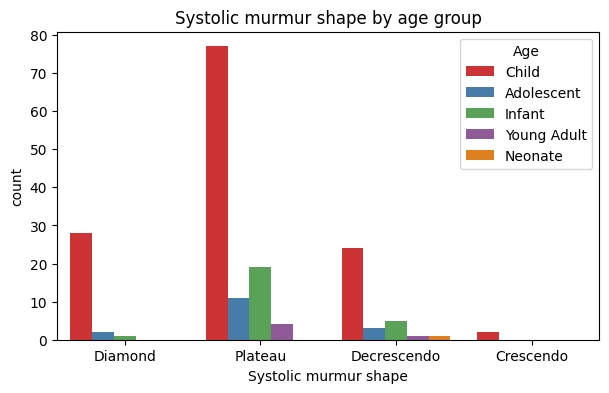

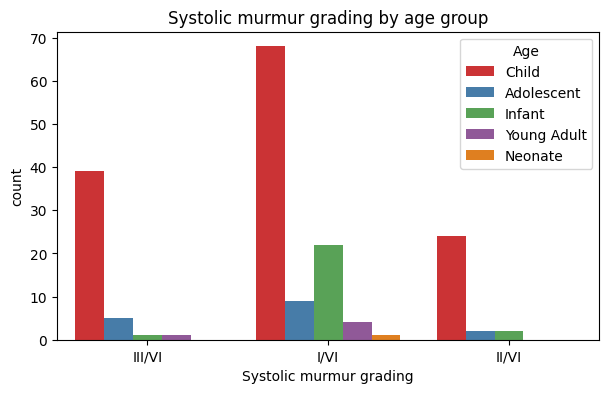

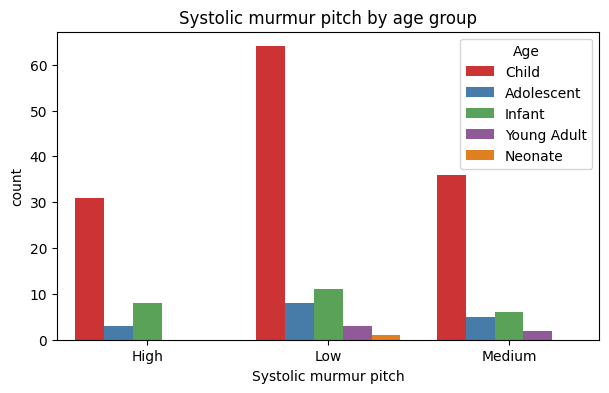

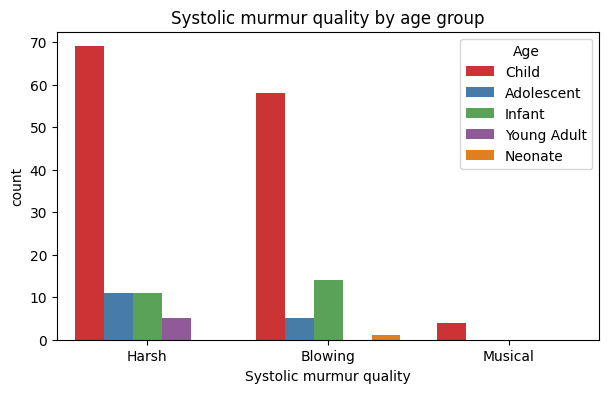

In [86]:
for col in Systolic_df.iloc[:,1:]:
    plt.figure(figsize=(7,4))
    
    sns.countplot(data=Systolic_df, x=col, hue='Age', palette='Set1')
    plt.title(col + " by age group")

    
    # plt.figure(figsize=(5, 3))
    # sns.barplot(x=counter_df.index, y=counter_df['Count'])
    # plt.title(col + " by total counts")
    # plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    # plt.show()

In [78]:
Diastolic_df = data[['Diastolic murmur timing', 'Diastolic murmur shape', 'Diastolic murmur grading', 'Diastolic murmur pitch', 'Diastolic murmur quality']]

Diastolic_df.head()

,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [81]:
# Loop through the columns and display unique values along with column names
for col in Diastolic_df:
    unique_values = Diastolic_df[col].unique()
    counter_obj = Counter(Diastolic_df[col])
    
    print(f"{col}\n{unique_values}\n{counter_obj}\n")

    counter_df = pd.DataFrame.from_dict(counter_obj, orient='index', columns=['Count'])
    
    # plt.figure(figsize=(5, 3))
    # sns.barplot(x=counter_df.index, y=counter_df['Count'])
    # plt.title(col + " by total counts")
    # plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    # plt.show()

Diastolic murmur timing
[nan 'Early-diastolic']
Counter({nan: 937, 'Early-diastolic': 5})

Diastolic murmur shape
[nan 'Decrescendo']
Counter({nan: 937, 'Decrescendo': 5})

Diastolic murmur grading
[nan 'I/IV' 'II/IV' 'III/IV']
Counter({nan: 937, 'I/IV': 3, 'II/IV': 1, 'III/IV': 1})

Diastolic murmur pitch
[nan 'Low' 'High' 'Medium']
Counter({nan: 937, 'Low': 2, 'Medium': 2, 'High': 1})

Diastolic murmur quality
[nan 'Blowing' 'Harsh']
Counter({nan: 937, 'Blowing': 4, 'Harsh': 1})



## **Segmentation Annotations:**

Analyze consensus and mismatches between algorithms and human annotations.